## Check the bottom

In [1]:
#Import DataFrame from Data-Cleaning-Notebook
import pickle
import pandas as pd
import numpy as np
infile = open('pickled_files/df.pickle','rb')
df = pickle.load(infile)
infile.close()


In [2]:
from sklearn.metrics import classification_report, plot_confusion_matrix, recall_score

def evaluation_report(model, X, y):
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))
    plot_confusion_matrix(model, X, y, cmap='GnBu')


df.head()

from sklearn.model_selection import train_test_split
X = df.drop(['stroke', 'age'], axis = 1)
y = df.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [4]:
X_train_nums = X_train.select_dtypes(['float64'])
X_train_cat = X_train.select_dtypes(exclude = ['float64'])

In [5]:
numerical_pipeline = imbpipeline(steps=[
                                ('ss', StandardScaler())
                            ])

categorical_pipeline = imbpipeline(steps=[
                            ('ohe', OneHotEncoder(drop='first',
                                                 sparse=False))
                            ])

trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [9]:
# # Create first pipeline for base without reducing features.

# rcf_pipe = imbpipeline(steps=[
#     ('trans', trans),
#     ('sm', SMOTE()),
#     ('rcf', RandomForestClassifier())
# ])


# # Create param grid.

# param_grid = [
#     {'rcf' : [RandomForestClassifier()],
#     'rcf__n_estimators' : list(range(100,600,200)),
#     'rcf__max_features' : list(range(1,18,1)),
#     'rcf__class_weight':['balanced_subsample','balanced'],
#     'rcf__max_depth' :[3,5,7]}
# ]

# # Create grid search object

# clf = GridSearchCV(rcf_pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring = 'recall')

# # Fit on data

# best_clf = clf.fit(X_train, y_train)



Fitting 5 folds for each of 306 candidates, totalling 1530 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 1530 out of 1530 | elapsed: 21.9min finished


In [10]:
# best_clf.best_params_

{'rcf': RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                        max_features=1, n_estimators=500),
 'rcf__class_weight': 'balanced_subsample',
 'rcf__max_depth': 3,
 'rcf__max_features': 1,
 'rcf__n_estimators': 500}

In [11]:
# best_clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      3662
           1       0.12      0.63      0.20       169

    accuracy                           0.78      3831
   macro avg       0.55      0.71      0.53      3831
weighted avg       0.94      0.78      0.84      3831



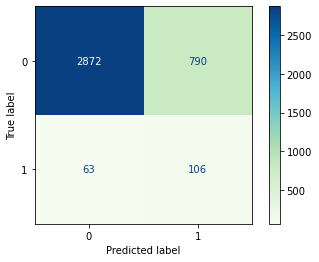

In [12]:
# evaluation_report(best_clf, X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1198
           1       0.16      0.65      0.25        80

    accuracy                           0.76      1278
   macro avg       0.56      0.71      0.55      1278
weighted avg       0.92      0.76      0.82      1278



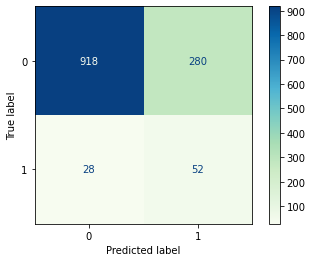

In [13]:
# evaluation_report(best_clf, X_test, y_test)

In [14]:
# rcf_pipe2 = imbpipeline(steps=[
#     ('trans', trans),
#     ('sm', SMOTE()),
#     ('rcf', RandomForestClassifier())
# ])


# param_grid = [
#     {'rcf' : [RandomForestClassifier()],
#     'rcf__n_estimators' : list(range(400,600,50)),
#     'rcf__class_weight':['balanced_subsample','balanced'],
#     'rcf__max_depth' :[2,3,4]}
# ]

# # Create grid search object

# clf2 = GridSearchCV(rcf_pipe2, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring = 'recall')

# # Fit on data

# best_clf2 = clf2.fit(X_train, y_train)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.9min finished


In [15]:
# best_clf2.best_params_

{'rcf': RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                        n_estimators=550),
 'rcf__class_weight': 'balanced_subsample',
 'rcf__max_depth': 2,
 'rcf__n_estimators': 550}

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      3662
           1       0.12      0.63      0.20       169

    accuracy                           0.78      3831
   macro avg       0.55      0.71      0.53      3831
weighted avg       0.94      0.78      0.84      3831



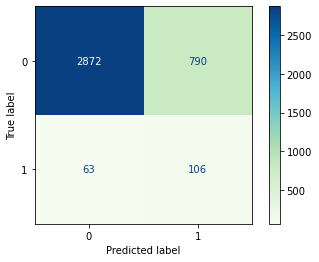

In [16]:
# evaluation_report(best_clf, X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1198
           1       0.16      0.65      0.25        80

    accuracy                           0.76      1278
   macro avg       0.56      0.71      0.55      1278
weighted avg       0.92      0.76      0.82      1278



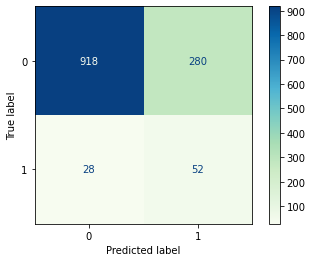

In [17]:
# evaluation_report(best_clf, X_test, y_test)

In [18]:
# rcf_pipe3 = imbpipeline(steps=[
#     ('trans', trans),
#     ('sm', SMOTE()),
#     ('rcf', RandomForestClassifier())
# ])


# param_grid = [
#     {'rcf' : [RandomForestClassifier()],
#     'rcf__n_estimators' : list(range(550,600,5)),
#     'rcf__class_weight':['balanced_subsample'],
#     'rcf__max_depth' :[2]}
# ]

# # Create grid search object

# clf3 = GridSearchCV(rcf_pipe3, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring = 'recall')

# # Fit on data

# best_clf3 = clf3.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


In [19]:
best_clf3.best_params_

{'rcf': RandomForestClassifier(class_weight='balanced_subsample', max_depth=2,
                        n_estimators=580),
 'rcf__class_weight': 'balanced_subsample',
 'rcf__max_depth': 2,
 'rcf__n_estimators': 580}

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      3662
           1       0.13      0.62      0.22       169

    accuracy                           0.80      3831
   macro avg       0.56      0.72      0.55      3831
weighted avg       0.94      0.80      0.86      3831



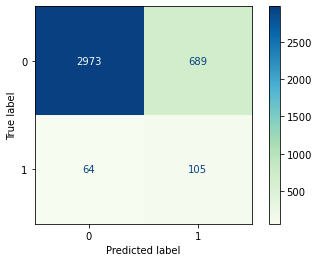

In [20]:
# evaluation_report(best_clf3, X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1198
           1       0.16      0.60      0.26        80

    accuracy                           0.78      1278
   macro avg       0.57      0.70      0.56      1278
weighted avg       0.92      0.78      0.83      1278



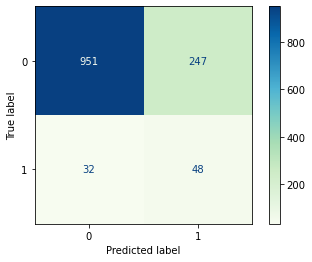

In [21]:
# evaluation_report(best_clf3, X_test, y_test)

In [22]:
import xgboost

In [47]:
steps = [('trans', trans),
         ('sm', SMOTE()),
         ('xgb3',xgboost.XGBClassifier(n_jobs = -1,
                                      max_depth = 2,
                                      learning_rate = 0.003,))]


xgb_pipe3 = imbpipeline(steps=steps)
xgb_pipe3.fit(X_train, y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['avg_glucose_level'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'bm...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
               

              precision    recall  f1-score   support

           0       0.99      0.35      0.52      3662
           1       0.06      0.91      0.11       169

    accuracy                           0.37      3831
   macro avg       0.52      0.63      0.31      3831
weighted avg       0.95      0.37      0.50      3831



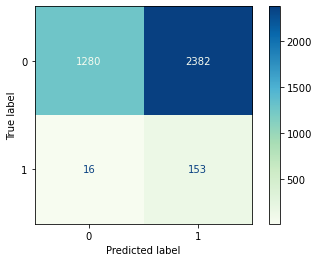

In [48]:
evaluation_report(xgb_pipe3, X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.34      0.50      1198
           1       0.09      0.97      0.16        80

    accuracy                           0.38      1278
   macro avg       0.54      0.66      0.33      1278
weighted avg       0.94      0.38      0.48      1278



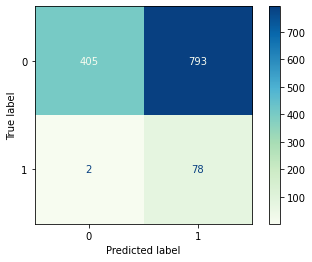

In [49]:
evaluation_report(xgb_pipe3, X_test, y_test)


In [56]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(xgb_pipe3, X_test, y_test, scoring='recall')

array([0.6875, 0.9375, 1.    , 0.6875, 0.9375])

In [50]:
xgb_pipe3.named_steps['xgb3'].feature_importances_

array([0.15791075, 0.        , 0.0990557 , 0.16920151, 0.40200028,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1718318 ], dtype=float32)

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
ohe = OneHotEncoder(sparse = False, drop = 'first')
ohe.fit_transform(X_train.select_dtypes(exclude = 'float64'))

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
cat_cols = (ohe.get_feature_names(X_train.select_dtypes(exclude = 'float64').columns))



In [98]:
column_names = ['avg_glucose_level']
column_names = column_names+cat_cols.tolist()

In [99]:
column_names

['avg_glucose_level',
 'gender_Male',
 'hypertension_1',
 'heart_disease_1',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'bmi_cat_obese',
 'bmi_cat_overweight',
 'bmi_cat_underweight',
 'bmi_cat_unknown']

In [100]:
pd.DataFrame(trans.fit_transform(X_train), columns=column_names)

,avg_glucose_level,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_cat_obese,bmi_cat_overweight,bmi_cat_underweight,bmi_cat_unknown
0,-0.015801,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.485375,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.407297,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.937526,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.114992,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,0.841742,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3827,1.413216,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3828,-0.191808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3829,-0.265696,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

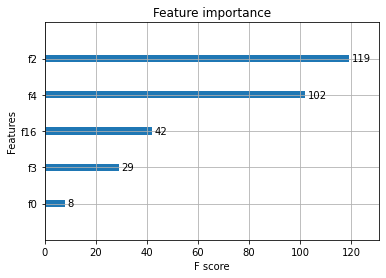

In [101]:
plot_importance(xgb_pipe3.named_steps['xgb3'])
pyplot.show()